In [1]:
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt
import cv2
print('libraries imported!')

libraries imported!


In [15]:
def RGB_to_Gray(I):
    """
    This Function averages out all the corressponding values of the channel in an image to produce a grey scale image
    """
    
    channels = I.shape[2]
    I_avg = np.zeros((I.shape[0],I.shape[1]))
    for channel in range(channels):
        I_avg = I_avg + I[:,:,channel]
    I_avg = I_avg/channels
    plt.imshow(I_avg,cmap="gray")
    plt.title("Grey Scale Image")
    return I_avg 
    

In [16]:
def Images_Discs(path=""):
    import os
    directory = os.listdir(path)
    images = []
    for image in directory:
        images.append(plt.imread(os.path.join(path,image)))
    return images
        

Salient Edge Indices Computed!


(4286, 2)

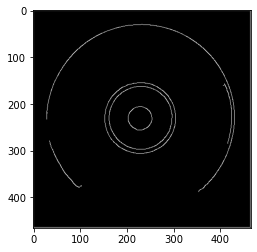

In [17]:
## int main()
path = "a7-discs"
Images = Images_Discs(path)
Images_grey = []

for image in Images:
    Images_grey.append(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))

#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#testing with the first image for now

I_grey = Images_grey[0]
plt.imshow(I_grey,cmap="gray")

Salients = feature.canny(image=I_grey, sigma=2.5).astype(np.int32)



Salients_indices = np.argwhere(Salients)
print('Salient Edge Indices Computed!')
plt.imshow(Salients,cmap="gray")

test = I_grey
Salients_indices.shape

### EM Iterations:

In [18]:
niters = 25

#initial parameters for the two models prior to perform EM
Cx = I_grey.shape[0]//2
Cy = I_grey.shape[1]//2
sigma = 128
r = 190

X = Salients_indices[:,0]
Y = Salients_indices[:,1]
#equation of a circle is: (X-Cx)^2 + (Y-Cy)^2 = r^2
#compute the residual of each point from the circle equation
#for the outliers, the residual probability is assumed uniform as 1/10
#the M-step should estimate the Cx, Cy, and r

# Computing B (as mentioned in Section-2 of Least-Squares Fitting of Circles and Ellipses)
B = np.vstack(((X**2+Y**2),X,Y,np.ones((X.shape[0])))).T
print(f"Matrix B generated with the following dimensions: {B.shape[0]} rows and {B.shape[1]} columns")

for niter in range(niters):
    
    # E-STEP
    d = np.abs(np.sqrt((X-Cx)**2+(Y-Cy)**2)-r) #using the model parameters estimated in the previous loop
    # computing the new residuals 
    
    prob_model_1 = np.exp(-d/sigma)**2 #probability is gaussian in nature
    prob_model_2 = 1/10 #probability is uniform in nature i.e., same across all points. No need to reshape this 
    # as broadcasting will automatically ensure dimensions are of the correct order
    denominator = prob_model_1+prob_model_2 #Assuming Equal Priors i.e., every data point initially is equally 
    # likely to belong to either one of the two models
    
    residual_1 = prob_model_1/denominator
    residual_1 = np.identity((residual_1.shape[0]))*np.reshape(residual_1,(residual_1.shape[0],1)) #setting up
    # the weights matrix with the shape nxn using identity matrix
    
    residual_2 = prob_model_2/denominator
    residual_2 = np.identity((residual_2.shape[0]))*np.reshape(residual_2,(residual_2.shape[0],1)) #setting up
    # the weights matrix with the shape nxn using identity matrix
    
    print(f"weights of model 1 have been computed with the {residual_1.shape[0]} rows and {residual_1.shape[1]} columns")
    print(f"weights of model 2 have been computed with the {residual_2.shape[0]} rows and {residual_2.shape[1]} columns")
    
    #Now that we have our residuals, we need to reupdate the model parameters. Since model 1 is a circle, we 
    # need to reestimate the Cx, Cy, r. Model 2 is an outlier model so no parameters to be updated. 
    
    # M-STEP
    for_svd_model_1 = residual_1@B #should give us nx4 matrix
    for_svd_model_2 = residual_2@B #should give us nx4 matrix

    u1,s1,v1 = np.linalg.svd(for_svd_model_1)
    u2,s2,v2 = np.linalg.svd(for_svd_model_2)
    print("svds computed")
    
    break

Matrix B generated with the following dimensions: 4286 rows and 4 columns
weights of model 1 have been computed with the 4286 rows and 4286 columns
weights of model 2 have been computed with the 4286 rows and 4286 columns
svds computed


In [20]:
u1.shape

(4286, 4286)

In [21]:
s1.shape

(4,)

In [22]:
v1.shape

(4, 4)

In [23]:
s1

array([8.96685580e+06, 7.40086334e+03, 3.49421805e+03, 1.41905118e+01])

In [ ]:
x = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])

In [ ]:
x.shape

In [ ]:
u,s,v = np.linalg.svd(x)

In [ ]:
u[2]

In [ ]:
v.shape

In [ ]:
s.shape

In [ ]:
s

In [24]:
import tensorflow as tf

ModuleNotFoundError: No module named 'tensorflow'